In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
file_data = r'C:\Users\TP\Desktop\CarPricePredictorInTunisia\Data\CleanedData2.csv'

df = pd.read_csv(file_data)

In [3]:
print(df)

           Brand         Model  Price  Boite vitesse  Cylindrée  \
0     Alfa_Romeo        Giulia  198.0           True      1.995   
1     Alfa_Romeo       Stelvio  265.0           True      1.995   
2           Audi  A3_Sportback  145.0           True      1.395   
3           Audi    A3_Berline  149.0           True      1.395   
4           Audi            A4  198.0           True      1.984   
...          ...           ...    ...            ...        ...   
4849   Ssangyong         Kyron   38.0           True      3.000   
4850      Autres        Autres   50.0          False      1.600   
4851     Peugeot           206   18.0          False      2.400   
4852     Citroen            C4   35.0          False      1.600   
4853  Mitsubishi        Canter   40.0          False      1.200   

      Puissance fiscale  Kilométrage   Age  Essence  Diesel  Electric  
0                    11          0.0   0.0     True   False     False  
1                    17          0.0   0.0     True

In [4]:
# Step 1: Encode the 'Brand' column with unique integers (same as before)
brand_mapping = {brand: idx + 1 for idx, brand in enumerate(df['Brand'].unique())}
df['Brand_encoded'] = df['Brand'].map(brand_mapping)
print(brand_mapping)
print("-------")

# Step 2: Encode the 'Model' column with a hierarchical format (e.g., 1.1, 1.2, etc.)
model_mapping = {}
for brand in df['Brand'].unique():
    unique_models = df[df['Brand'] == brand]['Model'].unique()
    model_mapping_for_brand = {model: f"{brand_mapping[brand]}.{idx + 1}" for idx, model in enumerate(unique_models)}
    model_mapping[brand] = model_mapping_for_brand
print(model_mapping)
print("-------")

# Apply the model mapping to the dataframe
df['Model_encoded'] = df.apply(lambda row: model_mapping[row['Brand']][row['Model']], axis=1)

df = df.drop('Brand', axis=1)
df = df.drop('Model', axis=1)
df = df.drop('Brand_encoded', axis=1)

# Display the DataFrame with encoded columns
print(df)

{'Alfa_Romeo': 1, 'Audi': 2, 'Bestune': 3, 'Bmw': 4, 'Byd': 5, 'Changan': 6, 'Chery': 7, 'Chevrolet': 8, 'Citroen': 9, 'Cupra': 10, 'Dacia': 11, 'Dfsk': 12, 'Dongfeng': 13, 'Faw': 14, 'Fiat': 15, 'Foday': 16, 'Ford': 17, 'Gac_Motor': 18, 'Geely': 19, 'Great_Wall': 20, 'Haval': 21, 'Honda': 22, 'Hyundai': 23, 'Jac': 24, 'Jaguar': 25, 'Jeep': 26, 'Kia': 27, 'Land_Rover': 28, 'Mahindra': 29, 'Mercedes_Benz': 30, 'Mg': 31, 'Mini': 32, 'Mitsubishi': 33, 'Nissan': 34, 'Opel': 35, 'Peugeot': 36, 'Porsche': 37, 'Renault': 38, 'Seat': 39, 'Skoda': 40, 'Ssangyong': 41, 'Suzuki': 42, 'Tata': 43, 'Toyota': 44, 'Volkswagen': 45, 'Volvo': 46, 'Wallyscar': 47, 'Citroën': 48, 'Mazda': 49, 'Infiniti': 50, 'Foton': 51, 'Isuzu': 52, 'Iveco': 53, 'Baic_Yx': 54, 'Lada': 55, 'Hyundai_Trucks': 56, 'Ds': 57, 'Dodge': 58, 'Tesla': 59, 'Gmc': 60, 'Maserati': 61, 'Autres': 62, 'Rover': 63, 'Smart': 64, 'Chrysler': 65, 'Acrea': 66, 'Lancia': 67}
-------
{'Alfa_Romeo': {'Giulia': '1.1', 'Stelvio': '1.2', 'Giuliett

In [5]:


# Re-define X and Y after cleaning the data
X = df.drop(columns=['Price'])
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Scale the features (important for models sensitive to feature scaling)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, Y_train)

# Predict using the trained model
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Decision Tree Regression Results")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Decision Tree Regression Results
Mean Absolute Error (MAE): 16.27
Mean Squared Error (MSE): 2131.56
Root Mean Squared Error (RMSE): 46.17
R-squared (R²): 0.67


In [7]:
# Before scaling and transforming, save the indices of the original X_test
X_test_indices = X_test.index

# Use the transformed data for predictions
for i in range(len(Y_pred)):
    # Print the car features (original X_test values using saved indices)
    print("The car is:", X_test.loc[X_test_indices[i]].to_dict())  # Convert to dict for a better display
    print("Predicted price:", Y_pred[i], "| Real price:", Y_test.iloc[i], " | diff",(Y_test.iloc[i]-Y_pred[i]))
    print("-------")

    

The car is: {'Boite vitesse': False, 'Cylindrée': 1.0, 'Puissance fiscale': 4, 'Kilométrage': 230.0, 'Age': 15.0, 'Essence': True, 'Diesel': False, 'Electric': False, 'Model_encoded': '38.1'}
Predicted price: 123.456 | Real price: 25.5  | diff -97.956
-------
The car is: {'Boite vitesse': False, 'Cylindrée': 3.0, 'Puissance fiscale': 4, 'Kilométrage': 75.0, 'Age': 4.0, 'Essence': True, 'Diesel': False, 'Electric': False, 'Model_encoded': '39.1'}
Predicted price: 42.5 | Real price: 45.0  | diff 2.5
-------
The car is: {'Boite vitesse': False, 'Cylindrée': 1.4, 'Puissance fiscale': 6, 'Kilométrage': 137.0, 'Age': 4.0, 'Essence': True, 'Diesel': False, 'Electric': False, 'Model_encoded': '15.19'}
Predicted price: 53.0 | Real price: 53.0  | diff 0.0
-------
The car is: {'Boite vitesse': True, 'Cylindrée': 1.4, 'Puissance fiscale': 8, 'Kilométrage': 70.0, 'Age': 1.0, 'Essence': True, 'Diesel': False, 'Electric': False, 'Model_encoded': '40.5'}
Predicted price: 93.0 | Real price: 93.0  | dif

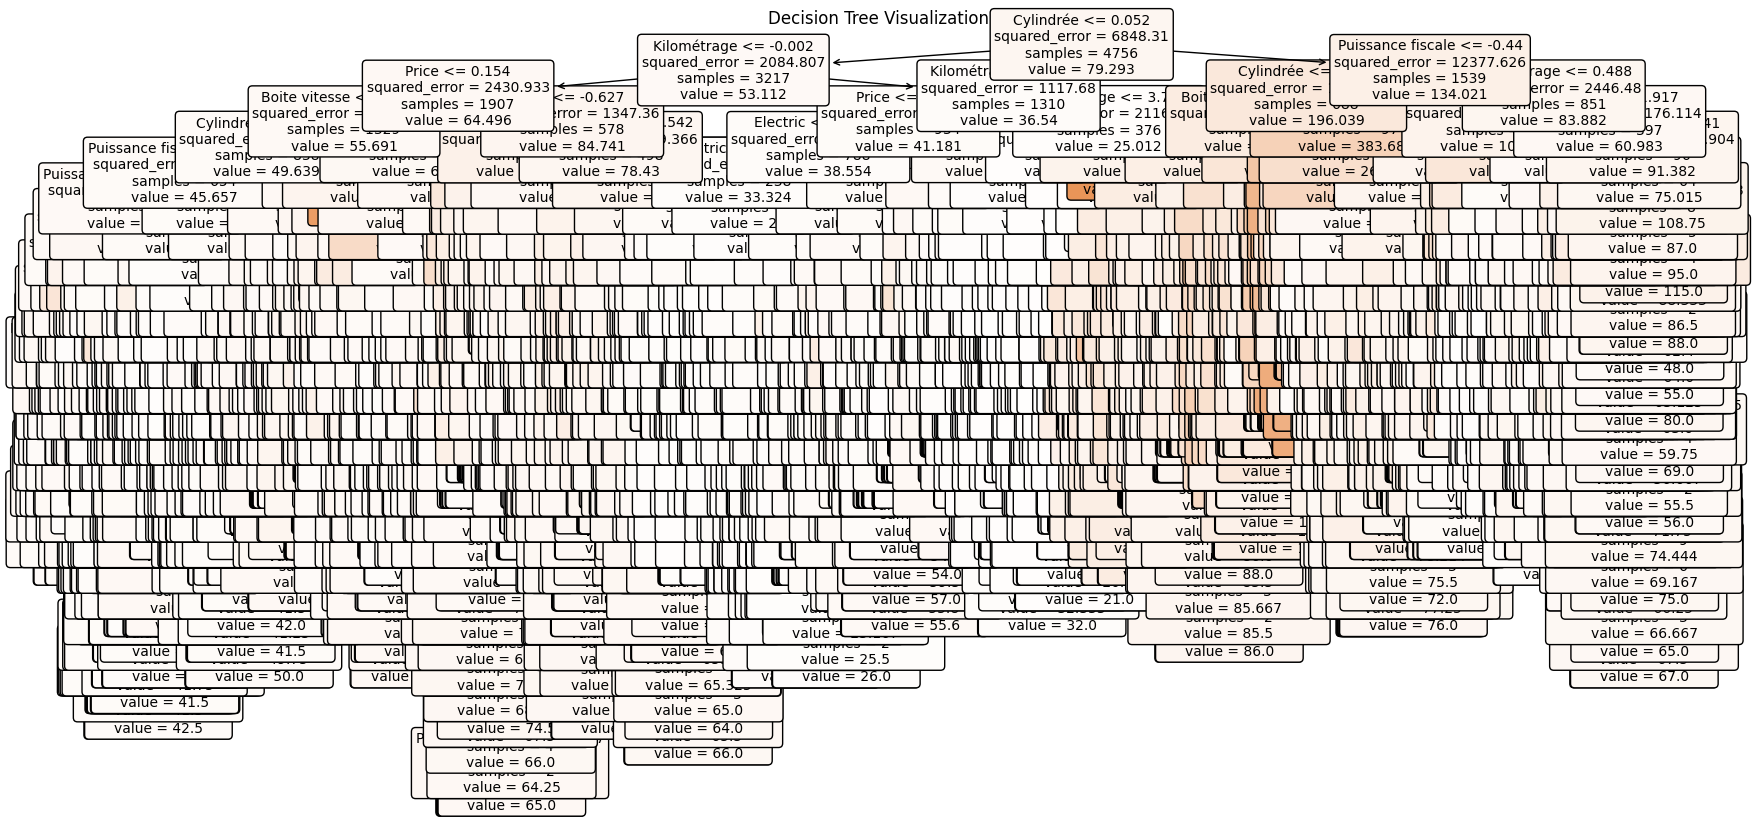

In [10]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=[df.columns[i] for i in range(X_train.shape[1])], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()